## Download nltk stopwords

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prashanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Import Packages

In [3]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [4]:
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [5]:
#spacy for lemmatization
import spacy

In [6]:
#Plotting tools
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Prashanna\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [7]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

## Prepare Stopwords

In [8]:
#NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use'])

## Import Newsgroups Data

In [9]:
#Import Dataset
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
print(df.target_names.unique())
df.head()

['rec.autos' 'comp.sys.mac.hardware' 'comp.graphics' 'sci.space'
 'talk.politics.guns' 'sci.med' 'comp.sys.ibm.pc.hardware'
 'comp.os.ms-windows.misc' 'rec.motorcycles' 'talk.religion.misc'
 'misc.forsale' 'alt.atheism' 'sci.electronics' 'comp.windows.x'
 'rec.sport.hockey' 'rec.sport.baseball' 'soc.religion.christian'
 'talk.politics.mideast' 'talk.politics.misc' 'sci.crypt']


,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


## Remove emails and newline characters

In [10]:
#Covert to list
data = df.content.values.tolist()

In [11]:
#Remove Emails
data = [re.sub('\S*@\S*\s?','',sent) for sent in  data]

In [12]:
#Remove new line characters
data = [re.sub('\s+',' ',sent) for sent in data]

In [13]:
#Remove distracting single quotes
data = [re.sub("\'","",sent) for sent in  data]

In [14]:
pprint(data[:1])

['From: (wheres my thing) Subject: WHAT car is this!? Nntp-Posting-Host: '
 'rac3.wam.umd.edu Organization: University of Maryland, College Park Lines: '
 '15 I was wondering if anyone out there could enlighten me on this car I saw '
 'the other day. It was a 2-door sports car, looked to be from the late 60s/ '
 'early 70s. It was called a Bricklin. The doors were really small. In '
 'addition, the front bumper was separate from the rest of the body. This is '
 'all I know. If anyone can tellme a model name, engine specs, years of '
 'production, where this car is made, history, or whatever info you have on '
 'this funky looking car, please e-mail. Thanks, - IL ---- brought to you by '
 'your neighborhood Lerxst ---- ']


## Tokenize words and Clean-up text

In [15]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))
data_words = list(sent_to_words(data))
print(data_words[:1])

[['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']]


## Creating Bigram and Trigram Models

In [16]:
#Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count = 5, threshold = 100)
trigram = gensim.models.Phrases(bigram[data_words], threshold = 100)

In [17]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [18]:
#See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp_posting_host', 'rac_wam_umd_edu', 'organization', 'university', 'of', 'maryland_college_park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front_bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']


## Remove Stopwords, Make Bigrams and Lemmatize

In [19]:
#Define functions for stopwords, bigrams, trigrams and lemmitization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [20]:
#Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [21]:
#Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [22]:
#Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm',disable = ['parser', 'ner'])

In [23]:
#Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['where', 'thing', 'car', 'nntp_poste', 'host', 'park', 'line', 'wonder', 'could', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'door', 'really', 'small', 'addition', 'separate', 'rest', 'body', 'know', 'model', 'name', 'engine', 'spec', 'year', 'production', 'car', 'make', 'history', 'info', 'funky', 'look', 'car', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst']]


## Create the Dictionary and Corpus needed for Topic Modeling

In [24]:
#Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

In [25]:
#Create Corpus
texts = data_lemmatized

In [26]:
#Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [27]:
#View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 5), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)]]


In [28]:
id2word[0]

'addition'

In [29]:
#Human readable format of corpus (term-frequency)
[[(id2word[id],freq) for id,freq in cp] for cp in corpus[:1]]

[[('addition', 1),
  ('body', 1),
  ('bring', 1),
  ('call', 1),
  ('car', 5),
  ('could', 1),
  ('day', 1),
  ('door', 2),
  ('early', 1),
  ('engine', 1),
  ('enlighten', 1),
  ('funky', 1),
  ('history', 1),
  ('host', 1),
  ('info', 1),
  ('know', 1),
  ('late', 1),
  ('lerxst', 1),
  ('line', 1),
  ('look', 2),
  ('mail', 1),
  ('make', 1),
  ('model', 1),
  ('name', 1),
  ('neighborhood', 1),
  ('nntp_poste', 1),
  ('park', 1),
  ('production', 1),
  ('really', 1),
  ('rest', 1),
  ('see', 1),
  ('separate', 1),
  ('small', 1),
  ('spec', 1),
  ('sport', 1),
  ('thank', 1),
  ('thing', 1),
  ('where', 1),
  ('wonder', 1),
  ('year', 1)]]

## Building the Topic Model

In [30]:
#Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = id2word,
                                           num_topics = 20,
                                           random_state = 100,
                                           update_every = 1,
                                           chunksize = 100,
                                           passes = 10,
                                           alpha = 'auto',
                                           per_word_topics = True)

## View the topics in LDA model

In [31]:
#Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.175*"file" + 0.073*"entry" + 0.057*"error" + 0.053*"display" + '
  '0.040*"program" + 0.030*"sun" + 0.025*"version" + 0.024*"cool" + '
  '0.020*"output" + 0.020*"crash"'),
 (1,
  '0.032*"would" + 0.026*"say" + 0.022*"think" + 0.022*"people" + 0.020*"go" + '
  '0.018*"know" + 0.016*"make" + 0.016*"see" + 0.014*"come" + 0.013*"thing"'),
 (2,
  '0.091*"evidence" + 0.048*"book" + 0.041*"faith" + 0.037*"reason" + '
  '0.033*"exist" + 0.032*"claim" + 0.031*"religion" + 0.029*"believe" + '
  '0.027*"christian" + 0.023*"church"'),
 (3,
  '0.541*"ax" + 0.054*"car" + 0.028*"player" + 0.014*"engine" + 0.009*"dealer" '
  '+ 0.009*"mile" + 0.009*"expensive" + 0.009*"here" + 0.008*"extra" + '
  '0.008*"specify"'),
 (4,
  '0.087*"belief" + 0.084*"internet" + 0.079*"atheist" + 0.061*"distribution" '
  '+ 0.053*"wing" + 0.041*"atheism" + 0.038*"printer" + 0.034*"interface" + '
  '0.026*"multiple" + 0.020*"thinking"'),
 (5,
  '0.088*"normal" + 0.072*"port" + 0.071*"mouse" + 0.053*"hole" + 0.03

## Compute Model Perplexity and Coherence Score

In [32]:
#Compute Perplexity, the measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

#Compute Coherence Score
coherence_model_lda = CoherenceModel(model = lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -12.486503603840534

Coherence Score:  0.49288861569721343


## Visualize the topics-keywords

In [ ]:
'''
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis
'''

## Building LDA Mallet Model

In [39]:
mallet_path = 'C:/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [40]:
# SHow Topics
pprint(ldamallet.show_topics(formatted = False))

[(8,
  [('write', 0.08888618677042802),
   ('article', 0.05632295719844358),
   ('post', 0.0418044747081712),
   ('line', 0.03769455252918288),
   ('question', 0.026215953307392997),
   ('read', 0.025729571984435796),
   ('make', 0.020257782101167316),
   ('group', 0.018166342412451363),
   ('opinion', 0.017096303501945527),
   ('people', 0.013861867704280155)]),
 (11,
  [('space', 0.022694477239931784),
   ('system', 0.011347238619965892),
   ('launch', 0.008220735493462767),
   ('design', 0.00795837159473523),
   ('large', 0.007389916480825572),
   ('high', 0.007236870873234509),
   ('project', 0.007040097949188858),
   ('base', 0.0064497791770519045),
   ('time', 0.006406051860597315),
   ('technology', 0.006362324544142726)]),
 (4,
  [('gun', 0.03021239806528495),
   ('people', 0.01628618828422553),
   ('kill', 0.012921466457929295),
   ('fire', 0.01247751010584854),
   ('crime', 0.012103652125148958),
   ('weapon', 0.010935345935462765),
   ('drug', 0.009089422155758581),
   ('art

In [41]:
#Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model = ldamallet, texts = data_lemmatized, dictionary = id2word, coherence = 'c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.5721317503684722


## Finding the optimal number of topics for LDA

In [42]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [43]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

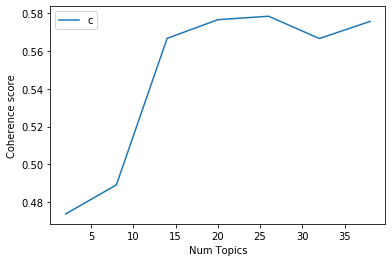

In [44]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [45]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4736
Num Topics = 8  has Coherence Value of 0.489
Num Topics = 14  has Coherence Value of 0.5668
Num Topics = 20  has Coherence Value of 0.5767
Num Topics = 26  has Coherence Value of 0.5785
Num Topics = 32  has Coherence Value of 0.5667
Num Topics = 38  has Coherence Value of 0.5757


In [46]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.018*"question" + 0.016*"exist" + 0.013*"argument" + 0.013*"claim" + '
  '0.013*"reason" + 0.012*"evidence" + 0.011*"true" + 0.009*"make" + '
  '0.008*"science" + 0.008*"human"'),
 (1,
  '0.971*"ax" + 0.001*"tq" + 0.001*"tg" + 0.000*"wwiz" + 0.000*"ei_ei" + '
  '0.000*"tm" + 0.000*"mb" + 0.000*"eqtm" + 0.000*"part" + 0.000*"wm_wm"'),
 (2,
  '0.055*"write" + 0.036*"people" + 0.034*"good" + 0.032*"article" + '
  '0.024*"opinion" + 0.020*"make" + 0.020*"post" + 0.019*"read" + '
  '0.013*"sound" + 0.012*"great"'),
 (3,
  '0.026*"gun" + 0.024*"law" + 0.020*"state" + 0.014*"people" + 0.013*"case" + '
  '0.011*"crime" + 0.010*"government" + 0.009*"weapon" + 0.008*"police" + '
  '0.007*"criminal"'),
 (4,
  '0.023*"space" + 0.010*"system" + 0.008*"launch" + 0.008*"high" + '
  '0.007*"project" + 0.007*"power" + 0.007*"design" + 0.006*"earth" + '
  '0.006*"mission" + 0.006*"time"'),
 (5,
  '0.032*"game" + 0.030*"year" + 0.029*"team" + 0.025*"play" + 0.020*"player" '
  '+ 0.017*"good" + 0

## Finding the dominant topic in each sentence

In [47]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.1492,"car, bike, buy, ride, line, good, engine, ligh...",From: (wheres my thing) Subject: WHAT car is t...
1,1,11.0,0.1843,"drive, price, system, sale, disk, speed, sell,...",From: (Guy Kuo) Subject: SI Clock Poll - Final...
2,2,16.0,0.1289,"thing, make, time, write, good, hear, bad, giv...",From: (Thomas E Willis) Subject: PB questions....
3,3,14.0,0.1104,"line, write, article, host, nntp_poste, organi...",From: (Joe Green) Subject: Re: Weitek P9000 ? ...
4,4,8.0,0.1460,"problem, line, window, work, run, card, driver...",From: (Jonathan McDowell) Subject: Re: Shuttle...
5,5,3.0,0.3773,"gun, law, state, people, case, crime, governme...",From: (Foxvog Douglas) Subject: Re: Rewording ...
6,6,7.0,0.1166,"file, line, number, read, follow, program, cop...",From: (brian manning delaney) Subject: Brain T...
7,7,11.0,0.4535,"drive, price, system, sale, disk, speed, sell,...",From: (GRUBB) Subject: Re: IDE vs SCSI Organiz...
8,8,8.0,0.1046,"problem, line, window, work, run, card, driver...",From: Subject: WIn 3.0 ICON HELP PLEASE! Organ...
9,9,8.0,0.1480,"problem, line, window, work, run, card, driver...",From: (Stan Kerr) Subject: Re: Sigma Designs D...


## Finding the most representative document for each topic

In [48]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6656,"question, exist, argument, claim, reason, evid...",From: (Petri Pihko) Subject: Re: Atheists view...
1,1.0,0.9949,"ax, tq, tg, wwiz, ei_ei, tm, mb, eqtm, part, w...",Subject: roman.bmp 12/14 From: (Cliff) Reply-T...
2,2.0,0.3719,"write, people, good, article, opinion, make, p...",From: (Ryan C Scharfy) Subject: Re: New Study ...
3,3.0,0.6173,"gun, law, state, people, case, crime, governme...",From: (Larry Cipriani) Subject: Ohio House Bil...
4,4.0,0.7494,"space, system, launch, high, project, power, d...",From: (Jon Leech) Subject: Space FAQ 11/15 - U...


## Topic distribution across documents

In [49]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,6.0,"car, bike, buy, ride, line, good, engine, ligh...",525.0,0.0464
1.0,11.0,"drive, price, system, sale, disk, speed, sell,...",10.0,0.0009
2.0,16.0,"thing, make, time, write, good, hear, bad, giv...",379.0,0.0335
3.0,14.0,"line, write, article, host, nntp_poste, organi...",556.0,0.0491
4.0,8.0,"problem, line, window, work, run, card, driver...",566.0,0.0500
...,...,...,...,...
11309.0,10.0,"study, find, food, effect, problem, doctor, pa...",NaN,NaN
11310.0,11.0,"drive, price, system, sale, disk, speed, sell,...",NaN,NaN
11311.0,6.0,"car, bike, buy, ride, line, good, engine, ligh...",NaN,NaN
11312.0,7.0,"file, line, number, read, follow, program, cop...",NaN,NaN
